In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import matplotlib.gridspec as gridspec

from sklearn.feature_selection import f_classif
from sklearn.preprocessing import power_transform
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report




In [2]:
%matplotlib inline

In [3]:
wine_info = datasets.load_wine()

In [4]:
wine_info

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
print(wine_info.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Features

**Alcohol:** Alcohol content, reported in units of ABV (alcohol by volume).

**Malic acid:** One of the principal organic acids found in wine. It projects the sour flavor into wine.

**Ash:** Wine has ash in it. Ash is simply the inorganic matter left after evaporation and incineration.

**Alcalinity of ash:** The alkalinity of ash determines how basic (as opposed to acidic) the ash in a wine is.

**Magnesium:** Magnesium affects the flavor of wine.

**Total phenols:** Phenols are chemicals that affect the taste, color, and mouthfeel (i.e., texture) of wine.

**Flavoids, Nonflavoid phenols, Proanthocyanins:** These are types of phenol present in wine

**Color intensity:** The color intensity of a wine: i.e., how dark it is.

**Hue:** The hue of a wine, which is typically determined by the color of the cultivar used (although this is not always the case).

**OD280/OD315 of diluted wines:** protein content measurements.

**Proline:** an amino acid present in wines.

In [6]:
for keys, values in wine_info.items():
    print('{}:\n{}\n\n'.format(keys, values))

data:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


frame:
None


target_names:
['class_0' 'class_1' 'class_2']


DESCR:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each 

In [7]:
print('Shape of the data {}\
      \nShape of the target {}'.format(wine_info.data.shape, wine_info.target.shape))

Shape of the data (178, 13)      
Shape of the target (178,)


In [8]:
df = pd.DataFrame(data = wine_info['data'], columns=wine_info.feature_names)
df['class'] = wine_info.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [12]:
df['class'] = df['class'].astype('category')

alcohol


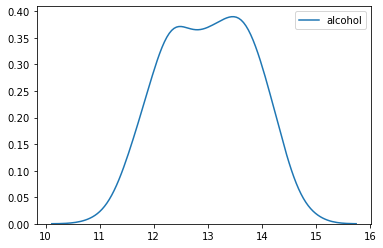

malic_acid


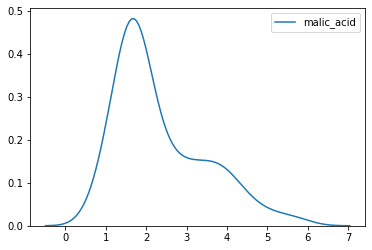

ash


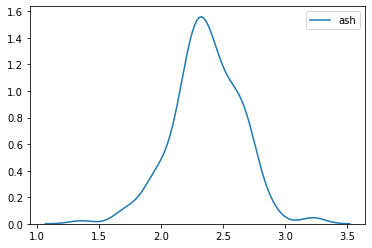

alcalinity_of_ash


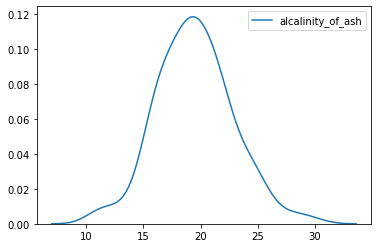

magnesium


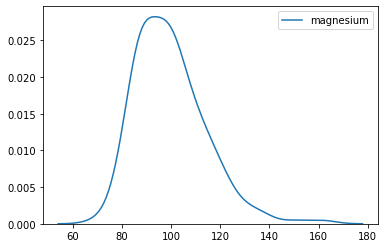

total_phenols


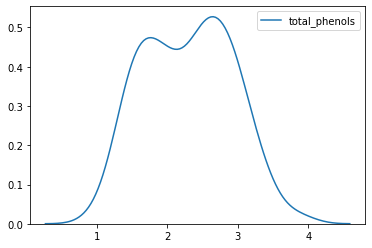

flavanoids


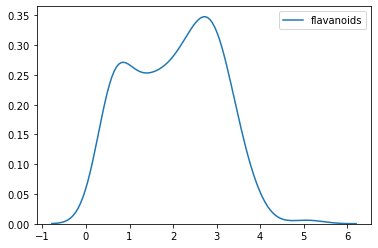

nonflavanoid_phenols


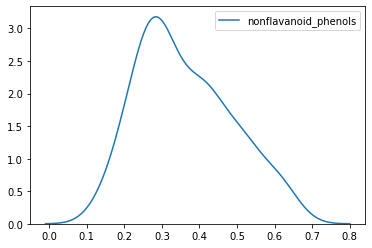

proanthocyanins


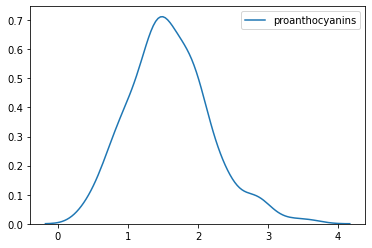

color_intensity


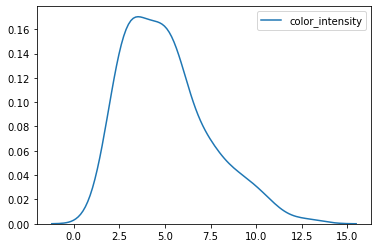

hue


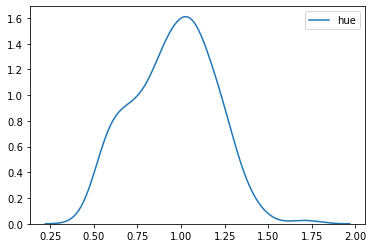

od280/od315_of_diluted_wines


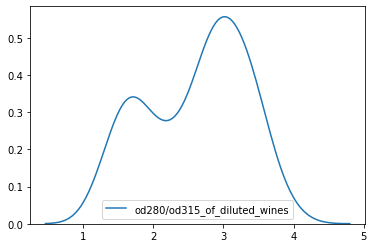

proline


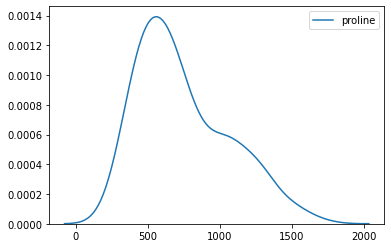

In [13]:
for x in df.columns[:-1]:
    print(x)
    sns.kdeplot(data=df[x])
    plt.show()

In [14]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [15]:
df['class'].value_counts(normalize = True)*100

1    39.887640
0    33.146067
2    26.966292
Name: class, dtype: float64

In [16]:
def barplot(x,df):
    plt.figure(figsize = (8,5))
    bar_plot1 = sns.countplot(x=x, data=df)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 0.5, height)

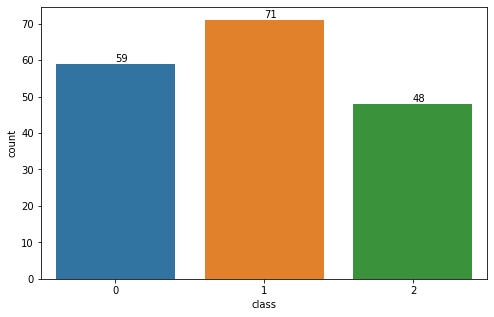

In [17]:
barplot('class',df)

Feature: alcohol


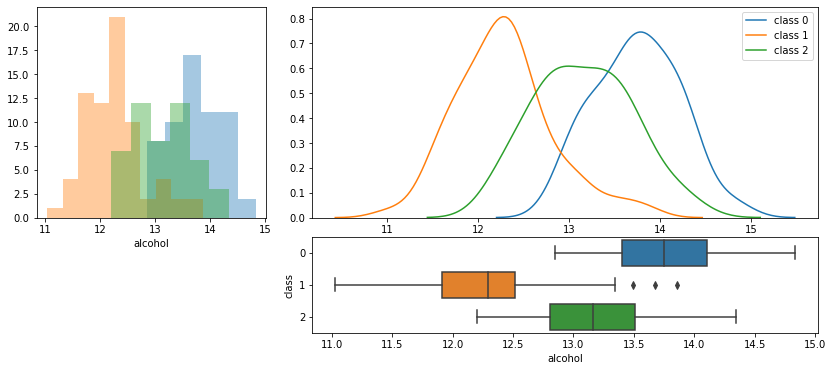

Feature: malic_acid


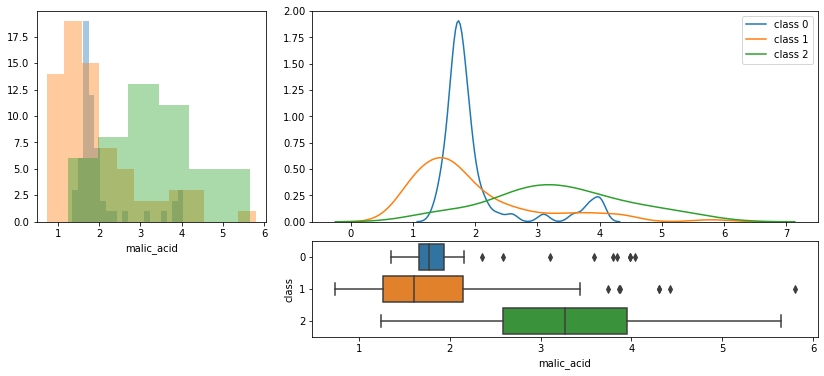

Feature: ash


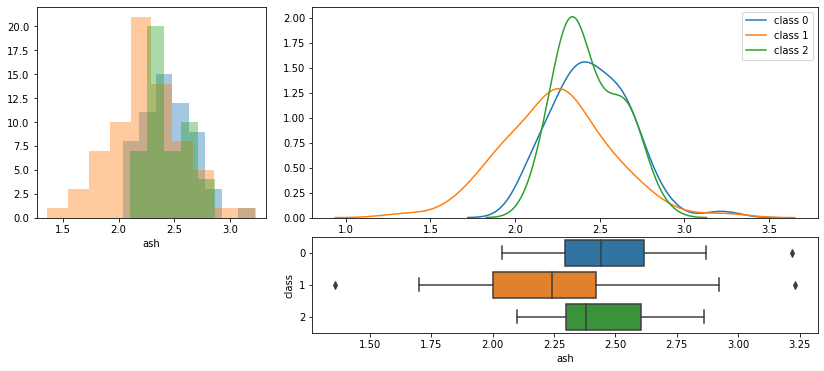

Feature: alcalinity_of_ash


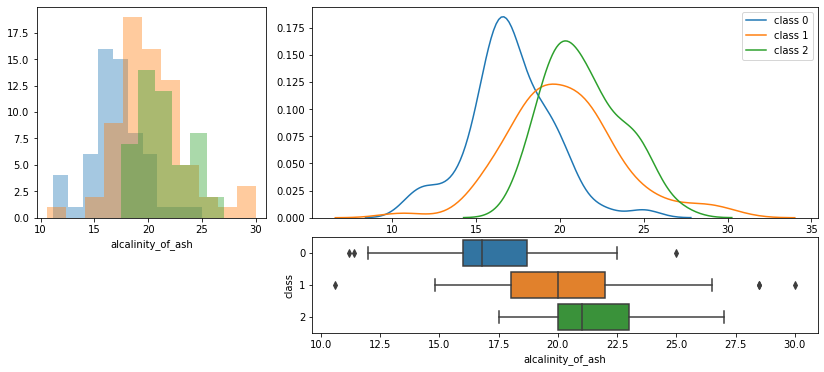

Feature: magnesium


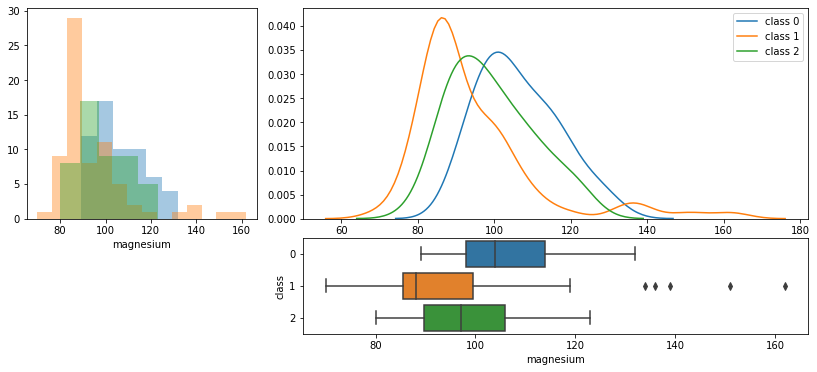

Feature: total_phenols


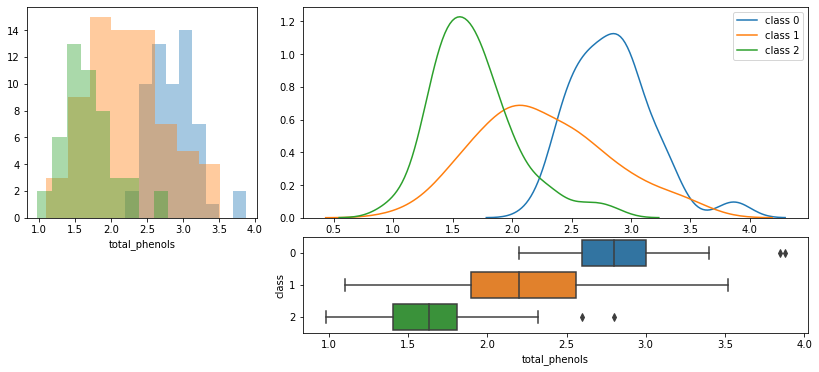

Feature: flavanoids


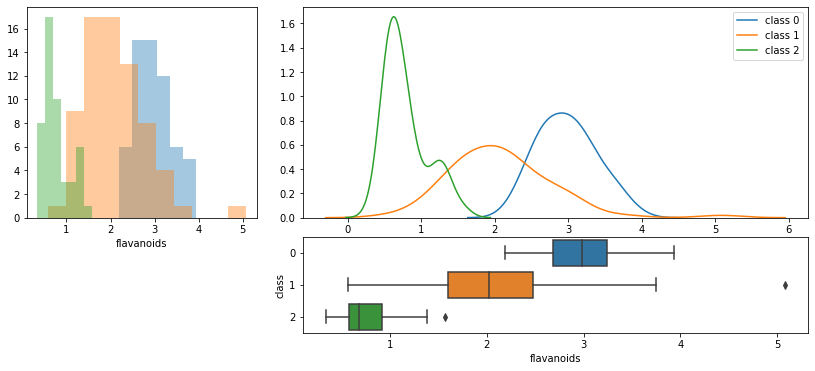

Feature: nonflavanoid_phenols


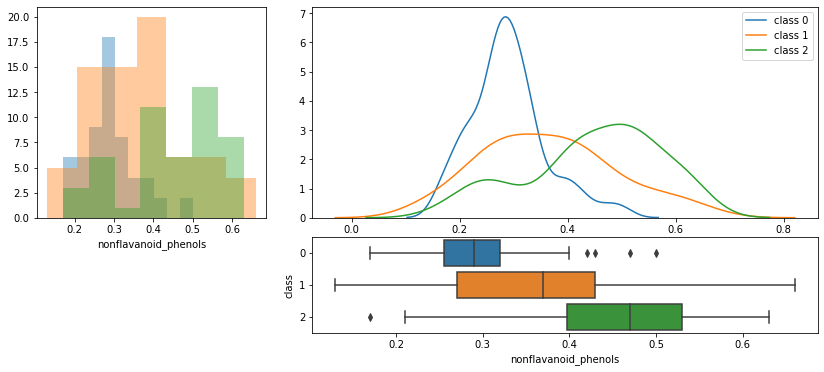

Feature: proanthocyanins


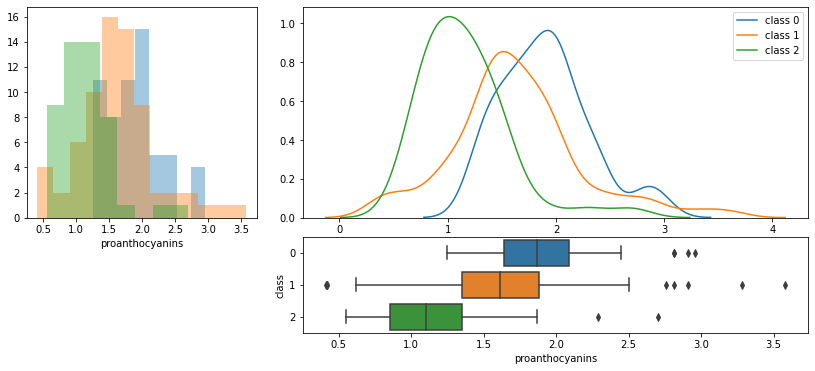

Feature: color_intensity


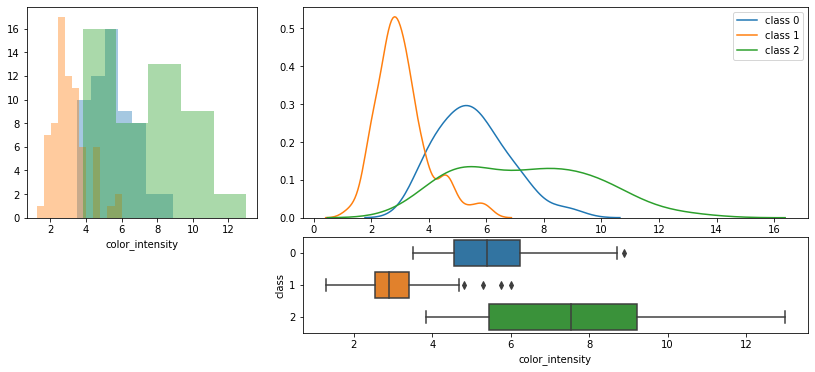

Feature: hue


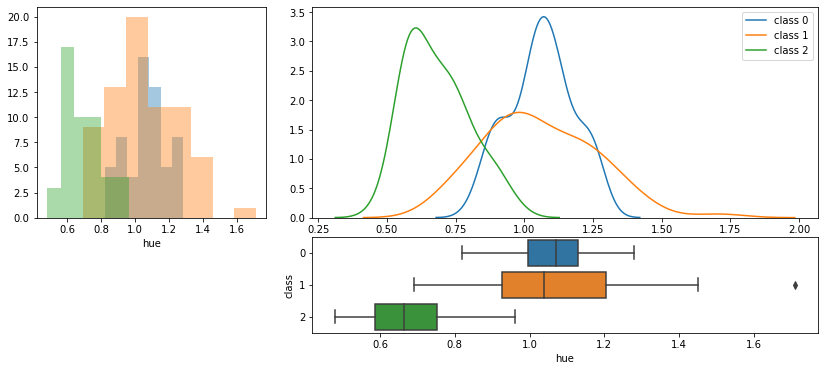

Feature: od280/od315_of_diluted_wines


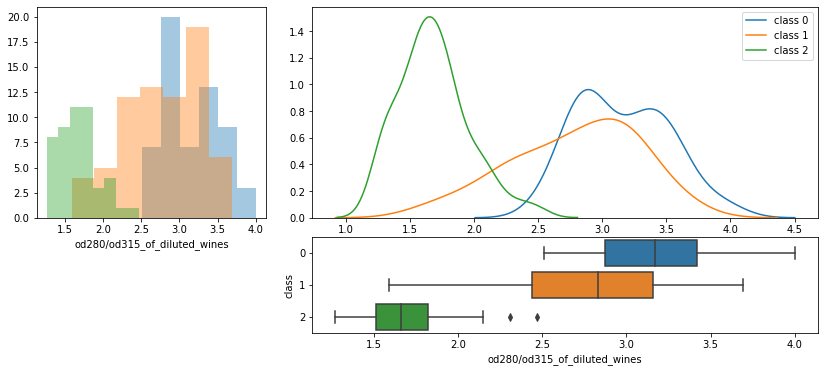

Feature: proline


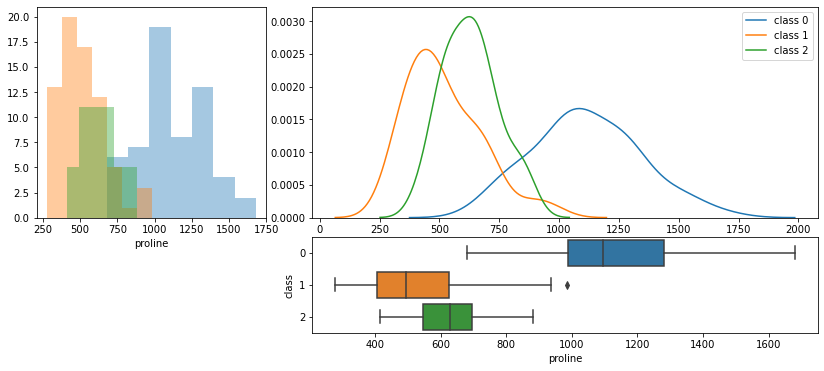

In [18]:
for x in df.columns[:-1]:
    fig = plt.figure(figsize=(14,6))
    gs = fig.add_gridspec(3,3)
    ax1 = fig.add_subplot(gs[:2,0])
    ax2 = fig.add_subplot(gs[:2,1:])
    ax3 = fig.add_subplot(gs[2,1:])
    
    print('Feature: {}'.format(x))
    sns.distplot(df[x][df['class'] == 0], ax = ax1, label ='class 0', kde = False)
    sns.distplot(df[x][df['class'] == 1], ax = ax1, label ='class 1', kde = False)
    sns.distplot(df[x][df['class'] == 2], ax = ax1, label ='class 2', kde = False)
    
    sns.kdeplot(df[x][df['class'] == 0], ax = ax2, label ='class 0')
    sns.kdeplot(df[x][df['class'] == 1], ax = ax2, label ='class 1')
    sns.kdeplot(df[x][df['class'] == 2], ax = ax2, label ='class 2')
    
    sns.boxplot(x = x, y = 'class', data = df, ax = ax3)
    
    plt.show()

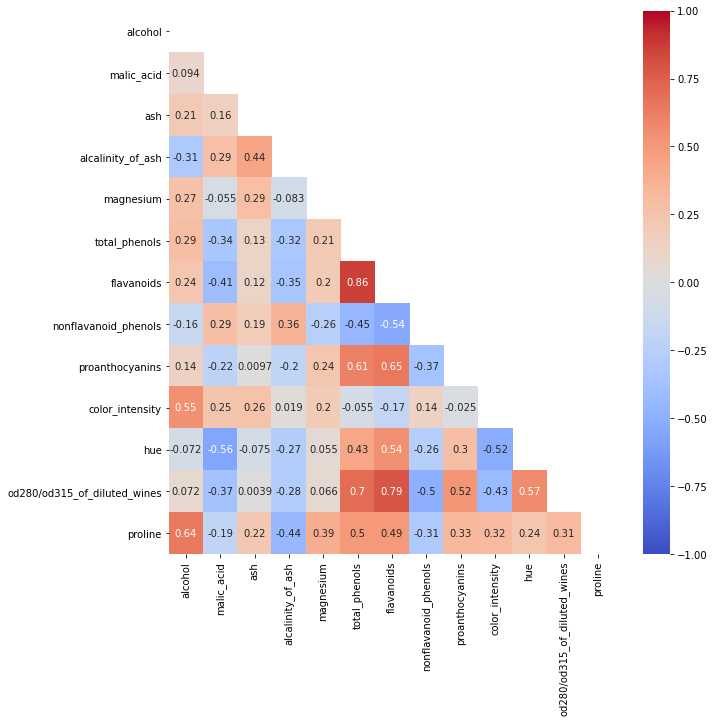

In [19]:
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

#### Some of the columns have high correlation

### F_Classif
* This is a univariate feature selection method, this takes one feature at a time and finds the linear dependency of the target variable on that feature based on F-scores.

In [20]:
mf = f_classif(X = df[df.columns[:-1]].values, y = df['class'])
mf_df = pd.DataFrame(mf, columns= df.columns[:-1], index=['F_value','Pvalue']).T
mf_df

,F_value,Pvalue
alcohol,135.077624,3.319504e-36
malic_acid,36.943425,4.127229e-14
ash,13.312901,4.149968e-06
alcalinity_of_ash,35.771637,9.444473e-14
magnesium,12.429584,8.963395e-06
total_phenols,93.733010,2.137670e-28
flavanoids,233.925873,3.598586e-50
nonflavanoid_phenols,27.575417,3.888041e-11
proanthocyanins,30.271383,5.125359e-12
color_intensity,120.664018,1.162008e-33


#### All the features are important

### Understanding the working of PCA

In [21]:
data = df.drop('class',axis = 1)

In [22]:
num_cols = list(df.select_dtypes(include = ['int64','float64']).columns)
print(num_cols)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [23]:
scaler = StandardScaler()
scaler.fit(data[num_cols]) 

StandardScaler()

In [24]:
data[num_cols] = scaler.transform(data[num_cols])

In [25]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [26]:
pca = PCA(0.90)
pca.fit(data)
pca_nd = pca.transform(data)

In [27]:
pca_nd = pd.DataFrame(data= pca_nd)
pca_nd.head()

,0,1,2,3,4,5,6,7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


### Train Test Split

In [28]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [29]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=340, stratify = y)

In [31]:
X_train.shape

(124, 13)

### Building Pipeline for preprocessing of the data

In [32]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('PCA', PCA(0.8))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols)])

#### Types of metrics measurements


**Macro Average:** Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

**Weighted Average:** Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

**Micro Average:** A micro-average of some measure will aggregate the contributions of all classes to compute the average measure.

*Check the link for better understanding of the difference between Macro and Micro Averages
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

In [33]:
def classifcation_report_and_CM_train_test(train, train_pred, val, val_pred):

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(train, train_pred, digits=2))
    

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            =========================================================
            ''')
    print(pd.crosstab(val, val_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(val, val_pred, digits=2))

In [34]:
scores = pd.DataFrame(columns=['Model','Train_Recall','Val_Recall','Train_Precision','Val_Precision','Train_F1_Score','Val_F1_Score','Train_Accuracy','Val_Accuracy',])

def get_metrics(train_actual,train_predicted,val_actual,val_predicted,model_description,dataframe):
    classifcation_report_and_CM_train_test(train_actual,train_predicted,val_actual,val_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    
    train_recall   = recall_score(train_actual,train_predicted, average = 'weighted')
    
    train_precision= precision_score(train_actual,train_predicted, average = 'macro')
    
    train_f1score  = f1_score(train_actual,train_predicted, average = 'micro')
    
    val_accuracy = accuracy_score(val_actual,val_predicted)
    
    val_recall   = recall_score(val_actual,val_predicted, average = 'weighted')
    
    val_precision= precision_score(val_actual,val_predicted, average = 'macro')
    
    val_f1score  = f1_score(val_actual,val_predicted, average = 'micro')
    
    dataframe = dataframe.append(pd.Series([model_description, train_recall,val_recall,train_precision,val_precision,train_f1score,
                                            val_f1score, train_accuracy,val_accuracy],
                                           index=scores.columns ), ignore_index=True)
    
    return(dataframe)

### Logistic Regression

In [35]:
logi_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression())])
logi_pipeline.set_params(classifier__penalty='l2',classifier__C=0.8)

logi_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.8))]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                        

In [36]:
train_pred =logi_pipeline.predict(X_train)
test_pred = logi_pipeline.predict(X_test)

In [37]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,'Logistic Regression',scores)


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted   0   1   2
Actual               
0          41   0   0
1           0  49   1
2           0   0  33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      0.98      0.99        50
           2       0.97      1.00      0.99        33

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted   0   1   2
Actual               
0          18   0   0
1           0  21   0
2           0   0  15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy   

In [38]:
scores

,Model,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1_Score,Val_F1_Score,Train_Accuracy,Val_Accuracy
0,Logistic Regression,0.991935,1.0,0.990196,1.0,0.991935,1.0,0.991935,1.0


### Decision Trees

In [39]:
%%time
DT_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

DT_pipeline.set_params(classifier__criterion='gini',classifier__random_state=340,  classifier__max_depth=4)

DT_pipeline.fit(X_train,y_train)

Wall time: 32.1 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.8))]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                        

In [40]:
train_pred =DT_pipeline.predict(X_train)
test_pred = DT_pipeline.predict(X_test)

In [41]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,'Decision Tree',scores)


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted   0   1   2
Actual               
0          41   0   0
1           0  50   0
2           0   0  33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted   0   1   2
Actual               
0          17   1   0
1           2  19   0
2           0   1  14
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.90      0.90        21
           2       1.00      0.93      0.97        15

    accuracy   

In [42]:
scores

,Model,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1_Score,Val_F1_Score,Train_Accuracy,Val_Accuracy
0,Logistic Regression,0.991935,1.000000,0.990196,1.000000,0.991935,1.000000,0.991935,1.000000
1,Decision Tree,1.000000,0.925926,1.000000,0.933166,1.000000,0.925926,1.000000,0.925926


### SVM Classifier

In [43]:
%%time
svc_lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

svc_lin_pipe.set_params(classifier__kernel='linear',classifier__C=0.5,
                   classifier__random_state=340)

svc_lin_pipe.fit(X_train,y_train)

Wall time: 18 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.8))]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                        

In [44]:
train_pred =svc_lin_pipe.predict(X_train)
test_pred = svc_lin_pipe.predict(X_test)

In [45]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,'SVC',scores)


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted   0   1   2
Actual               
0          41   0   0
1           0  49   1
2           0   0  33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      0.98      0.99        50
           2       0.97      1.00      0.99        33

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted   0   1   2
Actual               
0          17   1   0
1           0  21   0
2           0   1  14
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.97        15

    accuracy   

In [46]:
scores

,Model,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1_Score,Val_F1_Score,Train_Accuracy,Val_Accuracy
0,Logistic Regression,0.991935,1.000000,0.990196,1.000000,0.991935,1.000000,0.991935,1.000000
1,Decision Tree,1.000000,0.925926,1.000000,0.933166,1.000000,0.925926,1.000000,0.925926
2,SVC,0.991935,0.962963,0.990196,0.971014,0.991935,0.962963,0.991935,0.962963


## From the above results we can see that basic Logistic Regression has given almost correct classification of all the classes, so it the best of the above three models.